In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\test\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# Install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

 ## Read the CSV and Perform Basic Data Cleaning    

In [4]:
# Read in csv
df = pd.read_csv("../Resources/Autism.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,...,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,...,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,...,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,...,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,...,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [5]:
# Encode strings into binary format
df = pd.get_dummies(df)
pd.set_option('display.max_columns', None)
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score,Sex_f,Sex_m,Ethnicity_aboriginal,Ethnicity_asian,Ethnicity_black,Ethnicity_hispanic,Ethnicity_latino,Ethnicity_middle eastern,Ethnicity_others,Ethnicity_south asians,Ethnicity_white,Jaundice _no,Jaundice _yes,Family_ASD_no,Family_ASD_yes,Residence_Afghanistan,Residence_AmericanSamoa,Residence_Angola,Residence_Antigua and Barbuda,Residence_Argentina,Residence_Armenia,Residence_Aruba,Residence_Australia,Residence_Austria,Residence_Azerbaijan,Residence_Bahamas,Residence_Bahrain,Residence_Bangladesh,Residence_Belgium,Residence_Bolivia,Residence_Brazil,Residence_Burundi,Residence_Canada,Residence_Chile,Residence_China,Residence_Costa Rica,Residence_Croatia,Residence_Cyprus,Residence_Czech Republic,Residence_Denmark,Residence_Djibouti,Residence_Ecuador,Residence_Egypt,Residence_Ethiopia,Residence_Finland,Residence_France,Residence_French Guiana,Residence_Germany,Residence_Honduras,Residence_Hong Kong,Residence_Hungary,Residence_Iceland,Residence_India,Residence_Indonesia,Residence_Iran,"Residence_Iran, Islamic Republic of",Residence_Iraq,Residence_Ireland,Residence_Italy,Residence_Japan,Residence_Jordan,Residence_Kazakhstan,Residence_Lebanon,Residence_Malaysia,Residence_Mexico,Residence_Nepal,Residence_Netherlands,Residence_New Zealand,Residence_Nicaragua,Residence_Niger,Residence_Norway,Residence_Oman,Residence_Pakistan,Residence_Peru,Residence_Philippines,Residence_Poland,Residence_Portugal,Residence_Qatar,Residence_Romania,Residence_Russia,Residence_Saint Kitts and Nevis,Residence_Saudi Arabia,Residence_Serbia,Residence_Sierra Leone,Residence_Singapore,Residence_South Africa,Residence_Spain,Residence_Sri Lanka,Residence_Sweden,Residence_Switzerland,Residence_Taiwan,Residence_Thailand,Residence_Tonga,Residence_Turkey,Residence_Turkmenistan,Residence_Ukraine,Residence_United Arab Emirates,Residence_United Kingdom,Residence_United States,Residence_Uruguay,Residence_Viet Nam,"Residence_Virgin Islands, U.S.",Residence_Zambia,Used_App_Before_no,Used_App_Before_yes,Screening Type_17 and more,Language_arabic,Language_english,Language_farsi,Language_french,Language_mandarin,Language_portuguese,Language_russian,Language_spanish,Language_turkish,Language_urdu,User_friend,User_health care professional,User_others,User_parent,User_relative,User_self,User_teacher,Class_NO,Class_YES
0,6,0,0,0,0,0,0,0,0,0,0,27,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,10,1,1,1,1,1,1,1,1,1,1,21,10,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,12,1,1,0,1,1,0,0,1,0,0,18,5,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,16,1,0,0,0,1,1,1,1,1,1,49,7,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,20,1,1,1,0,0,0,0,1,0,0,18,4,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## Select ML features    

In [6]:
# Set features. Start off with all inputs except 'Case No'
X = df.drop(columns=['Class_NO','Class_YES', 'Case No', 'Score'])
y = df[['Class_NO','Class_YES']]
print(X.shape, y.shape)

(1117, 134) (1117, 2)


In [ ]:
# Perform feature selection after grid search, and then I can run this cell, altering inputs
# NOTE: These are the features I ultimately selected after running ExtraTreeClassifier below Gridsearch
Xsel = df[['A5', 'A9', 'A6', 'A3', 'A4', 'A1', 'A2', 'A7', 'A10', 'A8']]
y = df[['Class_NO','Class_YES']]
print(Xsel.shape, y.shape)

## Create a Train Test Split     
*Use 'Class' for the y values*

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

## Pre-processing     
*Scale the data using the MinMaxScaler*

In [9]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

#X
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#y
y_scaler = MinMaxScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

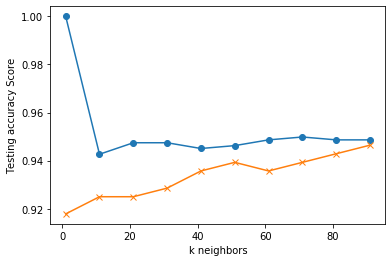

In [10]:
# Loop through different k values to see which has the highest accuracy

#KNN
from sklearn.neighbors import KNeighborsClassifier

# Set up empty arrays for our training and testing scores
train_scores = []
test_scores = []

# For loop 
for k in range(1, 100, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_scaled)
    train_score = knn.score(X_train_scaled, y_train_scaled)
    test_score = knn.score(X_test_scaled, y_test_scaled)
    train_scores.append(train_score)
    test_scores.append(test_score)
    #print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 100, 10), train_scores, marker='o')
plt.plot(range(1, 100, 10), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
# Note that k: 21 seems to be the best choice for this dataset

# Define the model
knn = KNeighborsClassifier(n_neighbors=21)

# Fit the model
gs = knn.fit(X_train_scaled, y_train_scaled)
print('k=21 Test Acc: %.3f' % knn.score(X_test_scaled, y_test_scaled))

k=21 Test Acc: 0.925


In [12]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test_scaled)}")

Training Data Score: 0.9474313022700119
Testing Data Score: 0.925


In [13]:
# Print off parameters for the KNN model
print(gs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')


In [14]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

# Set up the parameters we want to check
param_grid = {'leaf_size': [1, 2, 5, 30, 36], 'n_neighbors': [11, 19, 21, 23, 51], 
             'p': [1, 2], 'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Define the grid
grid = GridSearchCV(knn, param_grid, verbose=3)

In [15]:
# Train the model with GridSearch
grid.fit(X_train_scaled,y_train_scaled)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 400 candidates, totalling 1200 fits
[CV] algorithm=auto, leaf_size=1, n_neighbors=11, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, n_neighbors=11, p=1, weights=uniform, score=0.907, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=11, p=1, weights=uniform 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=auto, leaf_size=1, n_neighbors=11, p=1, weights=uniform, score=0.953, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=11, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, n_neighbors=11, p=1, weights=uniform, score=0.946, total=   0.2s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s



[CV] algorithm=auto, leaf_size=1, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=1, n_neighbors=11, p=1, weights=distance, score=0.910, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=1, n_neighbors=11, p=1, weights=distance, score=0.953, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=1, n_neighbors=11, p=1, weights=distance, score=0.946, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, n_neighbors=11, p=2, weights=uniform, score=0.907, total=   0.3s
[CV] algorithm=auto, leaf_size=1, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, n_neighbors=11, p=2, weights=uniform, score=0.953, total=   0.4s
[CV] algorithm=auto, leaf_size=1, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, n_neighbors=11, p=2, weigh

[CV]  algorithm=auto, leaf_size=1, n_neighbors=51, p=1, weights=uniform, score=0.946, total=   0.3s
[CV] algorithm=auto, leaf_size=1, n_neighbors=51, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=1, n_neighbors=51, p=1, weights=distance, score=0.921, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=51, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=1, n_neighbors=51, p=1, weights=distance, score=0.961, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=51, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=1, n_neighbors=51, p=1, weights=distance, score=0.946, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=51, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, n_neighbors=51, p=2, weights=uniform, score=0.921, total=   0.4s
[CV] algorithm=auto, leaf_size=1, n_neighbors=51, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=1, n_neighbors=51, p=2, weights=uniform, score=0.953, total=   0.4s
[CV] algorithm=auto, leaf_size=1, 

[CV]  algorithm=auto, leaf_size=2, n_neighbors=23, p=1, weights=distance, score=0.910, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=23, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=2, n_neighbors=23, p=1, weights=distance, score=0.953, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=23, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=2, n_neighbors=23, p=1, weights=distance, score=0.950, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=23, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=2, n_neighbors=23, p=2, weights=uniform, score=0.914, total=   0.2s
[CV] algorithm=auto, leaf_size=2, n_neighbors=23, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=2, n_neighbors=23, p=2, weights=uniform, score=0.950, total=   0.2s
[CV] algorithm=auto, leaf_size=2, n_neighbors=23, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=2, n_neighbors=23, p=2, weights=uniform, score=0.953, total=   0.2s
[CV] algorithm=auto, leaf_size=2, n

[CV]  algorithm=auto, leaf_size=5, n_neighbors=21, p=1, weights=distance, score=0.946, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=21, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=5, n_neighbors=21, p=2, weights=uniform, score=0.918, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=21, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=5, n_neighbors=21, p=2, weights=uniform, score=0.950, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=21, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=5, n_neighbors=21, p=2, weights=uniform, score=0.950, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=21, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=5, n_neighbors=21, p=2, weights=distance, score=0.918, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=21, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=5, n_neighbors=21, p=2, weights=distance, score=0.950, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n

[CV]  algorithm=auto, leaf_size=30, n_neighbors=19, p=1, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=auto, leaf_size=30, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_neighbors=19, p=2, weights=uniform, score=0.921, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_neighbors=19, p=2, weights=uniform, score=0.946, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=30, n_neighbors=19, p=2, weights=uniform, score=0.950, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_neighbors=19, p=2, weights=distance, score=0.925, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=30, n_neighbors=19, p=2, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=auto, lea

[CV]  algorithm=auto, leaf_size=36, n_neighbors=11, p=2, weights=uniform, score=0.953, total=   0.1s
[CV] algorithm=auto, leaf_size=36, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=36, n_neighbors=11, p=2, weights=uniform, score=0.946, total=   0.0s
[CV] algorithm=auto, leaf_size=36, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=36, n_neighbors=11, p=2, weights=distance, score=0.907, total=   0.0s
[CV] algorithm=auto, leaf_size=36, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=36, n_neighbors=11, p=2, weights=distance, score=0.953, total=   0.0s
[CV] algorithm=auto, leaf_size=36, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=36, n_neighbors=11, p=2, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=auto, leaf_size=36, n_neighbors=19, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=36, n_neighbors=19, p=1, weights=uniform, score=0.921, total=   0.0s
[CV] algorithm=auto, le

[CV]  algorithm=auto, leaf_size=36, n_neighbors=51, p=2, weights=uniform, score=0.957, total=   0.1s
[CV] algorithm=auto, leaf_size=36, n_neighbors=51, p=2, weights=uniform 
[CV]  algorithm=auto, leaf_size=36, n_neighbors=51, p=2, weights=uniform, score=0.946, total=   0.1s
[CV] algorithm=auto, leaf_size=36, n_neighbors=51, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=36, n_neighbors=51, p=2, weights=distance, score=0.921, total=   0.0s
[CV] algorithm=auto, leaf_size=36, n_neighbors=51, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=36, n_neighbors=51, p=2, weights=distance, score=0.957, total=   0.0s
[CV] algorithm=auto, leaf_size=36, n_neighbors=51, p=2, weights=distance 
[CV]  algorithm=auto, leaf_size=36, n_neighbors=51, p=2, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=11, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=11, p=1, weights=uniform, score=0.907, total=   0.1s
[CV] algorithm=

[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=2, weights=uniform, score=0.918, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=2, weights=uniform, score=0.946, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=2, weights=uniform, score=0.953, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=2, weights=distance, score=0.918, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=2, weights=distance, score=0.946, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=2, weights=distance, score=

[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=21, p=2, weights=uniform, score=0.918, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=21, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=21, p=2, weights=uniform, score=0.950, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=21, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=21, p=2, weights=uniform, score=0.950, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=21, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=21, p=2, weights=distance, score=0.918, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=21, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=21, p=2, weights=distance, score=0.950, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=21, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=21, p=2, weights=distance, score=

[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=19, p=1, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=19, p=1, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=19, p=2, weights=uniform, score=0.921, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=19, p=2, weights=uniform, score=0.950, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=19, p=2, weights=uniform, score=0.950, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=19, p=2, weights=distance, score=0

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=1, weights=uniform, score=0.950, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=1, weights=uniform, score=0.946, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=1, weights=distance, score=0.910, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=1, weights=distance, score=0.953, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=1, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2, weights=unif

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=23, p=2, weights=distance, score=0.950, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=23, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=23, p=2, weights=distance, score=0.950, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=51, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=51, p=1, weights=uniform, score=0.921, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=51, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=51, p=1, weights=uniform, score=0.957, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=51, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=51, p=1, weights=uniform, score=0.946, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=51, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=51, p=1, weights=distan

[CV]  algorithm=ball_tree, leaf_size=36, n_neighbors=21, p=2, weights=uniform, score=0.946, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=36, n_neighbors=21, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=36, n_neighbors=21, p=2, weights=uniform, score=0.950, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=36, n_neighbors=21, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=36, n_neighbors=21, p=2, weights=distance, score=0.918, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=36, n_neighbors=21, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=36, n_neighbors=21, p=2, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=36, n_neighbors=21, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=36, n_neighbors=21, p=2, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=36, n_neighbors=23, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=36, n_neighbors=23, p=1, weights=unif

[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=19, p=1, weights=distance, score=0.946, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=19, p=2, weights=uniform, score=0.921, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=19, p=2, weights=uniform, score=0.950, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=19, p=2, weights=uniform, score=0.950, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=19, p=2, weights=distance, score=0.925, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=19, p=2, weights=distance, score=0.950, total=   0.3s
[C

[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=11, p=1, weights=distance, score=0.910, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=11, p=1, weights=distance, score=0.953, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=11, p=1, weights=distance, score=0.950, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=11, p=2, weights=uniform, score=0.907, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=11, p=2, weights=uniform, score=0.953, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=11, p=2, weights=uniform, score=0.946, total=   0.2s
[C

[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=51, p=1, weights=uniform, score=0.953, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=51, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=51, p=1, weights=uniform, score=0.946, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=51, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=51, p=1, weights=distance, score=0.921, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=51, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=51, p=1, weights=distance, score=0.961, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=51, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=51, p=1, weights=distance, score=0.946, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=51, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=51, p=2, weights=uniform, score=0.921, total=   0.4s
[

[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=1, weights=uniform, score=0.914, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=1, weights=uniform, score=0.950, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=1, weights=uniform, score=0.953, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=1, weights=distance, score=0.910, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=1, weights=distance, score=0.953, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=1, weights=distance, score=0.950, total=   0.1s
[

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=21, p=1, weights=uniform, score=0.918, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=21, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=21, p=1, weights=uniform, score=0.950, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=21, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=21, p=1, weights=uniform, score=0.950, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=21, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=21, p=1, weights=distance, score=0.914, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=21, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=21, p=1, weights=distance, score=0.950, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=21, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=21, p=1, weights=distance, score=0.946, tota

[CV]  algorithm=kd_tree, leaf_size=36, n_neighbors=19, p=1, weights=uniform, score=0.950, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=36, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=36, n_neighbors=19, p=1, weights=distance, score=0.921, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=36, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=36, n_neighbors=19, p=1, weights=distance, score=0.950, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=36, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=36, n_neighbors=19, p=1, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=36, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=36, n_neighbors=19, p=2, weights=uniform, score=0.921, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=36, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=36, n_neighbors=19, p=2, weights=uniform, score=0.950, tota

[CV]  algorithm=brute, leaf_size=1, n_neighbors=11, p=1, weights=uniform, score=0.907, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=11, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=1, n_neighbors=11, p=1, weights=uniform, score=0.950, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=11, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=1, n_neighbors=11, p=1, weights=uniform, score=0.953, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=1, n_neighbors=11, p=1, weights=distance, score=0.907, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=1, n_neighbors=11, p=1, weights=distance, score=0.953, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=1, n_neighbors=11, p=1, weights=distance, score=0.950, total=   0.0s
[CV] algorithm=brute, l

[CV]  algorithm=brute, leaf_size=1, n_neighbors=51, p=1, weights=uniform, score=0.953, total=   0.1s
[CV] algorithm=brute, leaf_size=1, n_neighbors=51, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=1, n_neighbors=51, p=1, weights=uniform, score=0.946, total=   0.1s
[CV] algorithm=brute, leaf_size=1, n_neighbors=51, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=1, n_neighbors=51, p=1, weights=distance, score=0.921, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=51, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=1, n_neighbors=51, p=1, weights=distance, score=0.961, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=51, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=1, n_neighbors=51, p=1, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=51, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=1, n_neighbors=51, p=2, weights=uniform, score=0.921, total=   0.0s
[CV] algorithm=brute, l

[CV]  algorithm=brute, leaf_size=2, n_neighbors=23, p=1, weights=uniform, score=0.946, total=   0.1s
[CV] algorithm=brute, leaf_size=2, n_neighbors=23, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=2, n_neighbors=23, p=1, weights=uniform, score=0.953, total=   0.1s
[CV] algorithm=brute, leaf_size=2, n_neighbors=23, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=2, n_neighbors=23, p=1, weights=distance, score=0.910, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=23, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=2, n_neighbors=23, p=1, weights=distance, score=0.953, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=23, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=2, n_neighbors=23, p=1, weights=distance, score=0.950, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=23, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=2, n_neighbors=23, p=2, weights=uniform, score=0.914, total=   0.0s
[CV] algorithm=brute, l

[CV]  algorithm=brute, leaf_size=5, n_neighbors=21, p=1, weights=uniform, score=0.950, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=21, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=5, n_neighbors=21, p=1, weights=distance, score=0.910, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=21, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=5, n_neighbors=21, p=1, weights=distance, score=0.950, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=21, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=5, n_neighbors=21, p=1, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=21, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=5, n_neighbors=21, p=2, weights=uniform, score=0.914, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=21, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=5, n_neighbors=21, p=2, weights=uniform, score=0.946, total=   0.0s
[CV] algorithm=brute, l

[CV]  algorithm=brute, leaf_size=30, n_neighbors=19, p=1, weights=distance, score=0.921, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=19, p=1, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=19, p=1, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=19, p=2, weights=uniform, score=0.921, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=19, p=2, weights=uniform, score=0.950, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=19, p=2, weights=uniform, score=0.950, total=   0.0s
[CV] algorith

[CV]  algorithm=brute, leaf_size=36, n_neighbors=11, p=1, weights=uniform, score=0.953, total=   0.1s
[CV] algorithm=brute, leaf_size=36, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=36, n_neighbors=11, p=1, weights=distance, score=0.907, total=   0.0s
[CV] algorithm=brute, leaf_size=36, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=36, n_neighbors=11, p=1, weights=distance, score=0.953, total=   0.0s
[CV] algorithm=brute, leaf_size=36, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=36, n_neighbors=11, p=1, weights=distance, score=0.950, total=   0.0s
[CV] algorithm=brute, leaf_size=36, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=36, n_neighbors=11, p=2, weights=uniform, score=0.903, total=   0.0s
[CV] algorithm=brute, leaf_size=36, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=36, n_neighbors=11, p=2, weights=uniform, score=0.950, total=   0.0s
[CV] algorit

[CV]  algorithm=brute, leaf_size=36, n_neighbors=51, p=1, weights=uniform, score=0.946, total=   0.1s
[CV] algorithm=brute, leaf_size=36, n_neighbors=51, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=36, n_neighbors=51, p=1, weights=distance, score=0.921, total=   0.0s
[CV] algorithm=brute, leaf_size=36, n_neighbors=51, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=36, n_neighbors=51, p=1, weights=distance, score=0.961, total=   0.0s
[CV] algorithm=brute, leaf_size=36, n_neighbors=51, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=36, n_neighbors=51, p=1, weights=distance, score=0.946, total=   0.0s
[CV] algorithm=brute, leaf_size=36, n_neighbors=51, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=36, n_neighbors=51, p=2, weights=uniform, score=0.921, total=   0.0s
[CV] algorithm=brute, leaf_size=36, n_neighbors=51, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=36, n_neighbors=51, p=2, weights=uniform, score=0.953, total=   0.0s
[CV] algorit

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=21, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 5, 30, 36],
                         'n_neighbors': [11, 19, 21, 23, 51], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [16]:
# Gridsearch Results
print(grid.best_params_)
print(grid.best_score_) # best TESTING score

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 51, 'p': 1, 'weights': 'distance'}
0.942652329749104


In [17]:
# Look at feature importances
# KNN doesn't have a feature importances, so we'll use ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train_scaled,y_train_scaled)

# For the first go-round, do index=X.columns
# Now, what's below is the final feature selection
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(60)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


A5                                0.143929
A9                                0.140425
A6                                0.139118
A3                                0.064166
A7                                0.054539
A4                                0.052328
A1                                0.048372
A2                                0.044927
A10                               0.042020
A8                                0.021062
Age                               0.020001
Ethnicity_middle eastern          0.018379
Ethnicity_white                   0.013219
Residence_United States           0.012606
Sex_m                             0.011540
Family_ASD_yes                    0.011180
Ethnicity_asian                   0.010526
Sex_f                             0.008972
Residence_United Kingdom          0.008382
Family_ASD_no                     0.007419
User_parent                       0.006802
Residence_India                   0.006159
Residence_New Zealand             0.005717
Jaundice _y

In [ ]:
# Classification Report
from sklearn.metrics import classification_report

predictions = gs.predict(X_test_scaled)
print(classification_report(y_test_scaled, predictions))

# OBSERVATIONS

Before doing any feature selection, performed pd.get_dummies and kept all inputs except 'Score', 'Class', and 'Case No'. K=21 appears to be where the graph levels off, so using that value, got an accuracy score on the testing data of .925     
Training data came back at ~.947  After gridsearch, best parameters were: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 51, 'p': 1, 'weights': 'distance'}       

'Best testing score': 0.942652329749104     

CLASSIFICATION REPORT:      
              
                  precision    recall  f1-score   support        

           0       0.97      0.92      0.94       190
           1       0.85      0.93      0.89        90      

       micro avg       0.93      0.93      0.93       280       
       macro avg       0.91      0.93      0.92       280       
    weighted avg       0.93      0.93      0.93       280         
     samples avg       0.93      0.93      0.93       280       


--------
Second go-round, going to keep questions plus age, sex, family history, and jaundice (ranked in that order on feature selection).  Ethnicity ranks high, but I'm going to leave that out.  I did look at the percentages of autism within the various ethnicities, which can be found in 'Stats_Notebooks', 'Other_Stats'.  For feature selection, I'm only going to focus on questions, age, jaundice, family history, and sex.       

So with only questions, age, sex, family history, and jaundice.  Got better results.  Again, graph seems to even out around k=21.  Accuracy improved to 0.954  Training score of ~.9618     
Best parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 51, 'p': 2, 'weights': 'distance'}       

'Best testing score': 0.965352449223417     

CLASSIFICATION REPORT:      

                 precision    recall  f1-score   support

           0       1.00      0.93      0.96       190
           1       0.87      1.00      0.93        90

       micro avg       0.95      0.95      0.95       280
       macro avg       0.94      0.97      0.95       280
    weighted avg       0.96      0.95      0.95       280
     samples avg       0.95      0.95      0.95       280     
     
 --------   
Third go-round: now going to remove jaundice.  K still seems to level off around 21.  Accuracy of .964, so a full percent higher than with jaundice.  Training score only slightly higher at .965  With gridsearch, again only a small boost:     
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 19, 'p': 2, 'weights': 'distance'}     

'Best testing score': 0.966547192353644     

CLASSIFICATION REPORT:  
             
                 precision    recall  f1-score   support

           0       1.00      0.95      0.97       190
           1       0.90      1.00      0.95        90

        micro avg       0.96      0.96      0.96       280
       macro avg       0.95      0.97      0.96       280
     weighted avg       0.97      0.96      0.96       280
      samples avg       0.96      0.96      0.96       280     
 -------     


Fourth go-round: removing family history now.  Again, k levels off around 21.  No change in testing accuracy, still at .964, the same number with family history.  Training data made a 'significant' jump to ~.976  After gridsearch:     
{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 19, 'p': 2, 'weights': 'distance'}     

'Best testing score': 0.973715651135006 -- jumped from .964, so not bad.  Interesting to note that the algorithm changed to ball_tree, and leaf_size to 30. Neighbors also changed to 19 (from 51) for the last two.       

CLASSIFICATION REPORT:     
              
                 precision    recall  f1-score   support

           0       0.99      0.95      0.97       190
           1       0.91      0.99      0.95        90

       micro avg       0.96      0.96      0.96       280
       macro avg       0.95      0.97      0.96       280
    weighted avg       0.97      0.96      0.96       280
     samples avg       0.96      0.96      0.96       280

---------
Fifth go-round: removing sex. K at 21, testing accuracy at .968 so not a huge difference from the 3rd and 4th go-rounds. But training data jumped to ~.986 which again is another full percent from when sex was an included input.  After gridsearch:  {'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 19, 'p': 2, 'weights': 'distance'}     

'Beste testing score': 0.986857825567503 --testing score jumped roughly 2% from before the hyperparameter tuning.  Algorithm changed to 'brute', which is a first.  Notice weights has never changed.      

CLASSIFICATION REPORT:     
             
                  precision    recall  f1-score   support

           0       1.00      0.95      0.98       190
           1       0.91      1.00      0.95        90

       micro avg       0.97      0.97      0.97       280
       macro avg       0.95      0.98      0.96       280
    weighted avg       0.97      0.97      0.97       280
     samples avg       0.97      0.97      0.97       280
--------     
Final go-round, removing age.  K again at 21, testing accuracy at .979 which is the highest of all tests.  Training data at ~.981  After gridsearch:  {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 21, 'p': 2, 'weights': 'distance'}     

'Best testing score': 0.986857825567503 --same testing score with and without age. Change in algorithm, leaf size, neighbors.     

CLASSIFICATION REPORT:       
                   
                   precision    recall  f1-score   support

           0       0.98      0.98      0.98       190
           1       0.97      0.97      0.97        90

      micro avg       0.98      0.98      0.98       280
      macro avg       0.98      0.98      0.98       280
    weighted avg       0.98      0.98      0.98       280
    samples avg       0.98      0.98      0.98       280



## Observations on the classification reports above
DEFINITIONS:     
<b>precision</b> is the ability of the classifier not to label as positive a sample that is negative     
<b>recall</b> is the ability of the classifier to find all the positive samples     
<b>F1 score</b> also known as balanced F-score or F-measure.  It's the weighted average of the precision and recall scores, with a best score of 1, worst of 0.     
      
*Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.*

NOTE: I don't fully understand the various averages.  Here's what I have so far:     
<b>macro average</b> (averaging the unweighted mean per label);     
<b>weighted average</b> (averaging the support-weighted mean per label);     
<b>sample average</b> (only for multilabel classification);     
<b>micro average</b> (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise.        
     
---------     
### <u>F1 score</u> ###       
The F1 score had the smallest variance (1%) between label '0' and '1' of all five input tweaks.  The highest variance came before any feature selection, where I only removed 'Case No', 'Class', and 'Score'.  The variance was 5%.  All other input changes resulted in a variance of 2-3%. Also, the F1 Scores were the highest for the '0' input.  Class 'NO' (meaning no autism) has 190 instances versus Class 'YES', so perhaps that explains why the F1 Score is higher for the '0' input across the board.

### <u>Precision</u> ### 
Precision is the ability to accurately label true negatives.  Precision was higher across the board for a classification of No (=0), which makes sense since that sample size is double the yes pool.  The precision for the 'No' classification was pretty steady, varying between .97 and 1, whereas the precision for the 'Yes' classification ranged from .85 to .97.      

The precision of the '1' label didn't improve until the last feature selection tweak.  It jumped from 0.91 to .97 in the last feature selection, where we removed all except for the questions.  Can we draw any conclusions from this?  Can we safely assume that the discrepency between labels is due to sample size? I'm unsure.     

### <u>Recall</u> ###
Precision and recall are related, recall being the ability to accurately label true positives.  So for recall, the 'yes' classification scored higher for all alterations to the feature selection.  So the model can more accurately predict when a person DOES have autism.   

### <u>Averages</u> ###
Doing gridsearch, the best weights parameter came back as 'distance.' Does this have any relation to the averages in the classification report?